# Proyek Analisis Data: [Bike Sharing Dataset]

*   Nama : [ Salsabila Mahiroh]
*   Email : [ Salsabilammm777@gmail.com ]
*   ID Dicoding : [ salsabilammm ]

# Menentukan pertanyaan bisnis

1. Bagaimana perbandingan rata-rata antara penyewa sepeda casual dan registered berdasarkan workingday dalam setiap bulannya?
2. Bagaimana perbandingan penyewa sepeda pengguna casual dan registered berdasarkan workingday dalam jam-nya


# Import Semua Package/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### Gathering Data

In [2]:
!gdown 1hGpWMNMBTjERgLUP5tYsC9cw7exeUhv0

Downloading...
From: https://drive.google.com/uc?id=1hGpWMNMBTjERgLUP5tYsC9cw7exeUhv0
To: /content/archive.zip
100% 293k/293k [00:00<00:00, 112MB/s]


In [3]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [4]:
# membaca dataset day dan menampilkannya
archive_day = pd.read_csv('/content/day.csv')
archive_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#membaca data hour dan menampilkannya
archive_hour = pd.read_csv('/content/hour.csv')
archive_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight :
1.   Pada proses 1 dan 2 menggunakan perintah "gdwon", untuk mengunduh file dari Google Drive pribadi dan mengekstrak file archive.zip
2. Pada proses ke-3 dan ke-4 melakukan : membaca dan menampilkan file data sewa sepeda per hari dan data sewa sepeda per jam (day dan hour )

### Assesing Data

Assesing data day

In [6]:
archive_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi:", archive_day.duplicated().sum())
archive_day.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
archive_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
archive_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Assesing data hour

In [10]:
archive_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi:", archive_hour.duplicated().sum())
archive_hour.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
archive_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
archive_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight :**
1. Dalam pemeriksaan informasi kedua dataset terdapat ketidaksesuaian tipe data pada dteday, sehingga akan dilanjut pada tahap cleaning data
2. Dalam pemeriksaan duplikasi, tidak terdapat data yang terduplikasi pada kedua dataset
3. Dalam pemeriksaan missing value, tidak terdapat missing value terhadap kedua dataset
4. Dalam pemeriksaan data yang kosong, tidak terdapat data yang kosong pada kedua dataset



### Cleaning Data

Cleaning data day

In [14]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  archive_day[column] = pd.to_datetime(archive_day[column])

In [15]:
archive_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Cleaning data hour

In [16]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  archive_hour[column] = pd.to_datetime(archive_hour[column])


In [17]:
archive_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight :**

Tipe data dteday pada kedua dataset yang semula "object" sudah diganti dan berubah ke "datetime"

# Exploratory Data Analys (EDA)

### Explor data archive_day

In [18]:
print(archive_day[['casual','registered','cnt']].describe())

            casual   registered          cnt
count   731.000000   731.000000   731.000000
mean    848.176471  3656.172367  4504.348837
std     686.622488  1560.256377  1937.211452
min       2.000000    20.000000    22.000000
25%     315.500000  2497.000000  3152.000000
50%     713.000000  3662.000000  4548.000000
75%    1096.000000  4776.500000  5956.000000
max    3410.000000  6946.000000  8714.000000


Dapat di lihat bahwa rata-rata nilai jumlah penyewa sepeda berdasarkan kedua jenis pengguna adalah 731.000000, nilai minimalnya 22.000000, dan nilai maximalnya 8714.000000

In [19]:
archive_day.groupby("workingday").agg(
    {
        "casual":"mean",
        "registered":"mean",
    }
)

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


In [20]:
archive_day.groupby("mnth").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "sum",
})


,casual,registered,cnt
mnth,,,
1,194.225806,1982.112903,134933
2,262.508772,2392.789474,151352
3,716.838710,2975.419355,228920
4,1013.366667,3471.533333,269094
5,1214.274194,4135.500000,331686
6,1231.766667,4540.600000,346342
7,1260.596774,4303.080645,344948
8,1161.919355,4502.500000,351194
9,1172.050000,4594.466667,345991


In [21]:
archive_day.groupby(["workingday", "mnth"]).agg({
    "casual": "mean",
    "registered": "mean",

})


casual   registered
workingday mnth                          
0          1      304.954545  1559.454545
           2      443.166667  1798.388889
           3     1229.647059  2409.000000
           4     1637.600000  2825.350000
           5     2137.263158  3433.842105
           6     2139.941176  4014.000000
           7     1901.428571  3504.190476
           8     1643.312500  3320.125000
           9     2056.750000  4061.450000
           10    1627.300000  3483.450000
           11    1045.700000  2997.800000
           12     504.047619  2302.523810
1          1      133.325000  2214.575000
           2      179.128205  2667.128205
           3      523.111111  3189.400000
           4      701.250000  3794.625000
           5      806.441860  4445.534884
           6      872.720930  4748.790698
           7      932.365854  4712.268293
           8      994.478261  4913.760870
           9      729.700000  4860.975000
           10     647.952381  4593.404762
           11     392.225000  3956.800000
           12     270.926829  3438.780488

In [22]:
numeric_data = archive_day.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

### Explore data hour

In [23]:
print(archive_hour[['casual','registered','cnt']].describe())

             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


In [24]:
archive_hour.groupby("hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "sum",
})

,casual,registered,cnt
hr,,,
0,10.158402,43.739669,39130
1,6.504144,26.871547,24164
2,4.772028,18.097902,16352
3,2.715925,9.011478,8174
4,1.253945,5.098996,4428
5,1.411437,18.478382,14261
6,4.161379,71.882759,55132
7,11.055021,201.009629,154171
8,21.679505,337.331499,261001


In [25]:
archive_hour.groupby(["hr", "workingday"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "sum",
})


casual  registered     cnt
hr workingday                                
0  0            16.647826   74.152174   20884
   1             7.149194   29.637097   18246
1  0            12.504348   57.004348   15987
   1             3.710526   12.842105    8177
2  0            10.399123   42.771930   12123
   1             2.137577    6.546201    4229
3  0             6.453744   19.321586    5851
   1             0.910638    4.031915    2323
4  0             2.264317    6.000000    1876
   1             0.765957    4.663830    2552
5  0             1.725225    6.963964    1929
   1             1.270707   23.642424   12332
6  0             3.820961   14.921397    4292
   1             4.318548   98.181452   50840
7  0             8.606061   34.800866   10027
   1            12.195565  278.417339  144144
8  0            20.424242   85.229437   24406
   1            22.264113  454.741935  236595
9  0            45.017316  126.606061   39645
   1            24.312500  217.205645  119793
10 0            79.268398  176.640693   59115
   1            31.205645  104.161290   67142
11 0           106.653680  208.662338   72838
   1            37.598790  120.631048   78482
12 0           126.246753  240.012987   84606
   1            41.358149  159.462777   99808
13 0           136.424242  236.307359   86101
   1            42.568273  155.861446   98818
14 0           139.593074  225.051948   84233
   1            45.869478  137.702811   91419
15 0           136.502165  222.311688   82886
   1            46.333333  154.997992  100263
16 0           128.614719  224.112554   81480
   1            48.344689  244.777555  146268
17 0           111.813853  211.735931   74740
   1            56.895792  468.394790  262120
18 0            84.221739  196.834783   64643
   1            50.451807  441.775100  245129
19 0            65.547826  166.126087   53285
   1            41.022088  307.379518  173504
20 0            46.765217  127.973913   40190
   1            31.369478  218.349398  124360
21 0            36.147826  105.913043   32674
   1            24.610442  161.676707   92771
22 0            28.056522   88.004348   26694
   1            19.572289  118.817269   68918
23 0            19.139130   66.791304   19764
   1            13.379518   75.329317   44177

In [26]:
numeric_data = archive_hour.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

Dengan melakukan serangkain proses eksploratory data day dan data hour ini, dapat untuk menjadi bahan pertimbangan saat melakukan proses explantory untuk menjawab pertanyaan bisnis yang sudah ditentukan dan mempresentasikannya dalam bentuk visualisasi

#Visualisasi dan Explantory Data

### Pertanyaan 1 :
1. Bagaimana perbandingan rata-rata antara penyewa sepeda casual dan registered berdasarkan workingday dalam setiap bulannya?

Workingday : hari kerja dan akhir pekan

<ipython-input-27-6c3624f6cd1f>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulan_casual = archive_day.groupby(["workingday", "mnth"]).agg({


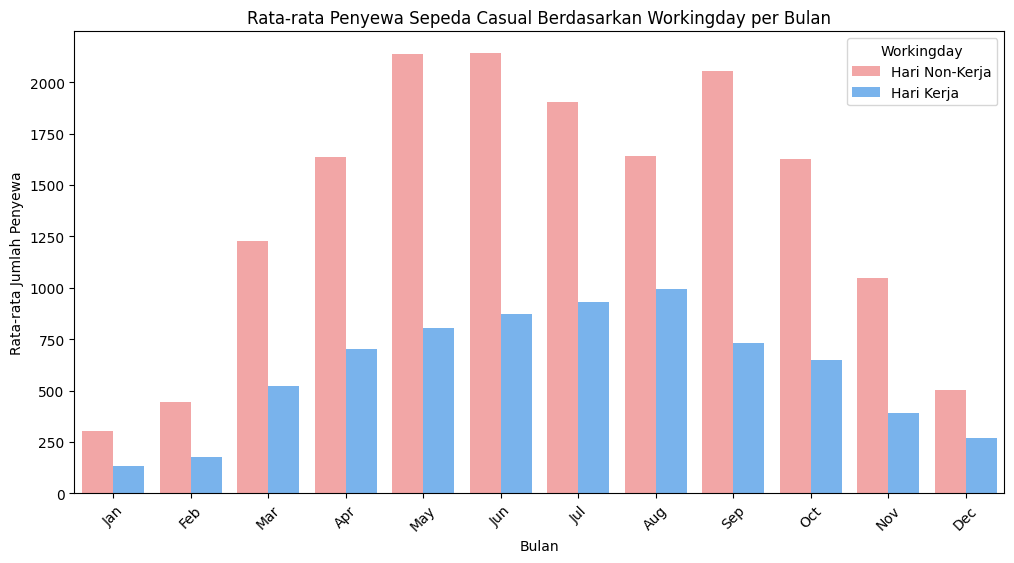

In [27]:
# Mapping angka bulan ke nama bulan
bulan = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

# Mapping bulan
archive_day["mnth"] = archive_day["mnth"].map(bulan)

# Mengatur urutan bulan
order_bulan = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
archive_day["mnth"] = pd.Categorical(archive_day["mnth"], categories=order_bulan, ordered=True)

# Agregasi data berdasarkan workingday dan bulan
bulan_casual = archive_day.groupby(["workingday", "mnth"]).agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Visualisasi bar chart penyewa sepeda casual berdasarkan working day per bulan
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=bulan_casual,
    x="mnth",
    y="casual",
    hue="workingday",
    palette=["#FF9999", "#66B3FF"]
)

plt.title("Rata-rata Penyewa Sepeda Casual Berdasarkan Workingday per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Penyewa")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Hari Non-Kerja", "Hari Kerja"], title="Workingday")

plt.xticks(rotation=45)
plt.show()


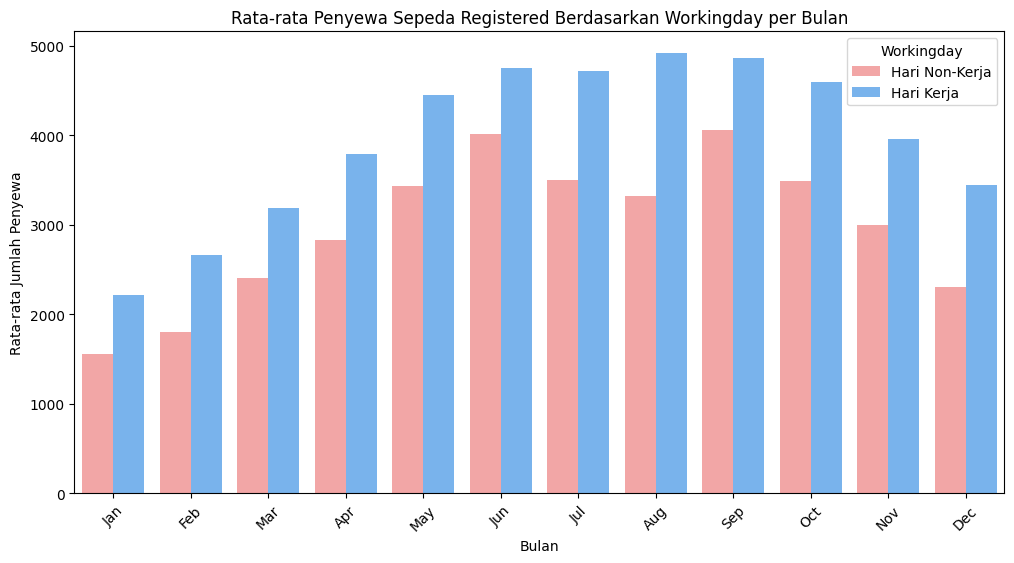

In [28]:
# Visualisasi bar chart penyewa sepeda registered berdasarkan working day per bulan
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=bulan_casual,
    x="mnth",
    y="registered",
    hue="workingday",
    palette=["#FF9999", "#66B3FF"]
)

plt.title("Rata-rata Penyewa Sepeda Registered Berdasarkan Workingday per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Penyewa")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Hari Non-Kerja", "Hari Kerja"], title="Workingday")

plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2
2. Bagaimana perbandingan penyewa sepeda pengguna casual dan registered berdasarkan workingday dalam jam-nya?

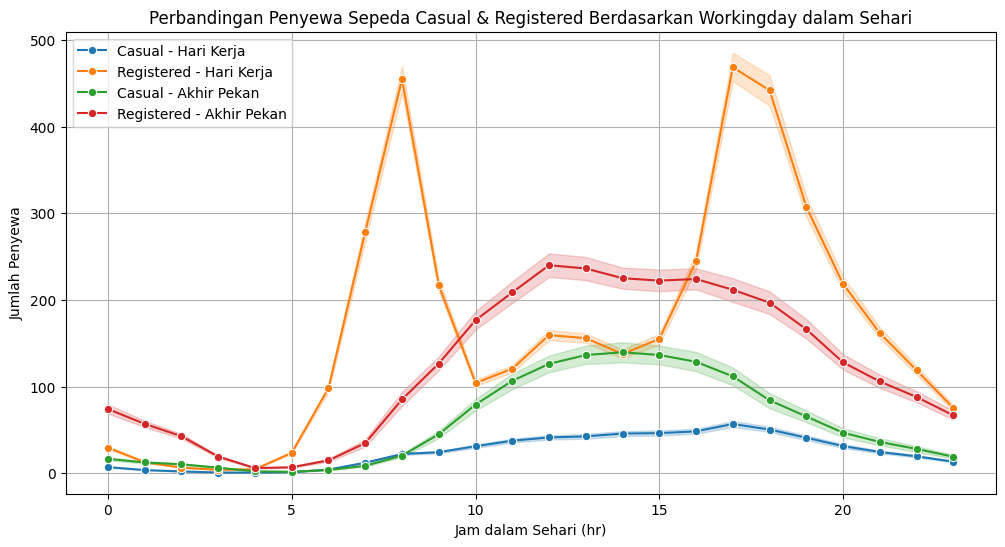

In [29]:
# Membuat visualisasi lineplot
plt.figure(figsize=(12,6))

# Plot untuk hari kerja (workingday=1)
sns.lineplot(
    data=archive_hour[archive_hour["workingday"] == 1],
    x="hr", y="casual", label="Casual - Hari Kerja", marker="o"
)
sns.lineplot(
    data=archive_hour[archive_hour["workingday"] == 1],
    x="hr", y="registered", label="Registered - Hari Kerja", marker="o"
)

# Plot untuk akhir pekan (workingday=0)
sns.lineplot(
    data=archive_hour[archive_hour["workingday"] == 0],
    x="hr", y="casual", label="Casual - Akhir Pekan", marker="o"
)
sns.lineplot(
    data=archive_hour[archive_hour["workingday"] == 0],
    x="hr", y="registered", label="Registered - Akhir Pekan", marker="o"
)

plt.title("Perbandingan Penyewa Sepeda Casual & Registered Berdasarkan Workingday dalam Sehari")
plt.xlabel("Jam dalam Sehari (hr)")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.grid()
plt.show()

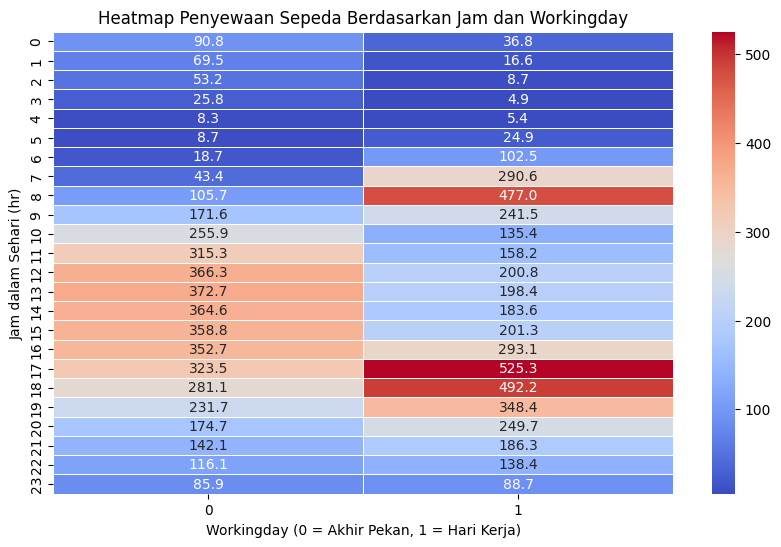

In [30]:
# membuat pivot table untuk heatmap
heatmap_data = archive_hour.pivot_table(
    values="cnt", index="hr", columns="workingday", aggfunc="mean"
)

# membuat visualisasi heatmap penyewa sepeda berdasarkan jam dan workingday
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Heatmap Penyewaan Sepeda Berdasarkan Jam dan Workingday")
plt.xlabel("Workingday (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Jam dalam Sehari (hr)")
plt.show()

**Insight**:


*   Berdasarkan hasil pertanyaan pertama, diperoleh pengguna sepeda registered lebih tinggi daripada pengguna casual. Pengguna registered mendominasi lebih tinggi pada hari kerja pada bulan Agustus, sedangkan pada pengguna casual di dominasi lebih tinggi pada akhir pekan pada bulan Juni.
*   Berdasarkan hasil pertanyaan ke-2, diperoleh dari hasil lineplot dan heatmap menunjukkan bahwa pola penyewaan sepeda sangat dipengaruhi oleh jenis pengguna dan waktu dalam sehari. Pada hari kerja, pengguna registered mendominasi dengan dua puncak utama di pagi hari sekitar jam 7-9 dan sore hari sekitar jam 5-7, yang menunjukkan tinggginya penyewa sepeda pada jam sibuk. Sementara itu, pengguna kasual cenderung lebih sedikit pada hari kerja dan lebih banyak penyewa pada akhir pekan, pengguna kasual meningkat secara signifikan dengan puncak di siang hingga sore hari.

## Analisis Lanjutan (Opsional)

## Conclusion

1. Conclution pertanyaan 1 : Dari hasil analisis tren penggunaan sepeda oleh penyewa casual dan registered berdasarkan workingday perbulannya, terlihat bahwa pengguna registered cenderung lebih banyak menyewa sepeda pada hari kerja dibandingkan akhir pekan. Mereka mengalami peningkatan yang stabil sejak awal tahun dan mencapai puncaknya pada bulan Agustus. Hal ini menunjukkan bahwa kemungkinan besar mereka menggunakan sepeda sebagai bagian dari rutinitas harian, salah satunya untuk bekerja. Setelah bulan Agustus, terjadi sedikit penurunan, yang kemungkinan berkaitan dengan perubahan aktivitas setelah pertengahan tahun. Sementara itu, pengguna casual lebih dominan menyewa sepeda di akhir pekan, yang mengindikasikan bahwa mereka lebih cenderung menggunakan sepeda untuk kegiatan rekreasi atau aktivitas santai. Jumlah penyewa casual mengalami lonjakan signifikan pada bulan Juni, yang kemungkinan disebabkan oleh beberapa faktor.
*   Dengan meningkatnya jumlah penyewa kasual pada akhir pekan, perusahaan dapat memanfaatkan tren ini dengan menempatkan lebih banyak sepeda di lokasi wisata, taman, atau tempat rekreasi. Dan dapat memberikan promosi atau paket khusus bagi pengguna kasual di akhir pekan.
2. Conclution pertanyaan 2 : Dari hasil analisis tren penggunaan sepeda oleh penyewa casual dan registered berdasarkan workingday dalam jam-nya, disimpulkan bawha, Pada hari kerja, pengguna registerd cenderung menyewa sepeda pada pagi hari hingga sore hari. Ini menunjukkan bahwa pengguna registered lebih banyak mengandalkan sepeda untuk sarana transportasi untuk melakuakn aktivitasnya. Sementara itu, pengguna kasual lebih sedikit melakukan penyewaan pada hari kerja, yang menunjukkan bahwa mereka cenderung tidak menggunakan sepeda untuk keperluan transportasi rutin. Namun pada akhir pekan, jumlah penyewa kasual meningkat pada pada jam-jam tertentu (siang hingga sore hari). Hal ini menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk kegiatan rekreasi atau aktivitas santai.
* Perusahaan sewa sepeda dapat mengoptimalkan layanan dengan memastikan ketersediaan sepeda yang cukup di pagi hingga sore hari pada hari kerja, terutama di area tempat orang bekerja atau kegiatan lainnya. Di sisi lain, untuk meningkatkan penyewaan pada akhir pekan, perusahaan bisa menawarkan promo khusus atau menyediakan sepeda yang lebih nyaman untuk rekreasi.




**Unduh File Data**

In [ ]:
archive_day.to_csv('archive_day_cleaned.csv', index=False)
archive_hour.to_csv('archive_hour_cleaned.csv', index=False)

In [ ]:
from google.colab import files

files.download('archive_day_cleaned.csv')
files.download('archive_hour_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>